# Next-Gen Diabetes Management: Pioneering Solutions

### Project Overview

> This project aims to investigate and analyze various factors related to diabetes management and health outcomes. The dataset consists of several important variables related to diabetes, lifestyle choices, health conditions, and socioeconomic factors. By conducting a thorough examination of these variables, the project aims to identify potential patterns, correlations, and insights that can contribute to enhanced diabetes care and overall health improvements.

### Business Problem




> A health insurance company wants to identify individuals at risk of developing diabetes or prediabetes based on the Behavioral Risk Factor Surveillance System (BRFSS) survey data for the year 2015. The company aims to use this information to design targeted prevention and intervention programs to reduce the risk of diabetes and improve the overall health of their policyholders.

### Business Objectives

1. To improve diabetes care, the project aims to analyze the dataset and identify key factors that can lead to better diabetes outcomes and overall health for patients.
2. To determine personalized treatment plans for diabetic patients based on identified patterns and correlations in the dataset.
3. To develop a robust predictive model that accurately estimates the probability of individuals contracting diabetes.

### Hypothesis

<b>H0: Diabetes is not influenced by our feature variables </br>H1: Diabetes is caused by certain feature variables </b>

## Data Understanding


#### **Dataset used**
Diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

It is a csv of the dataset available on Kaggle for the year 2015 can be found on this [link ](https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook) . 

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from IPython.display import Image
from pandas_profiling import ProfileReport

In [1]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head(5)

<IPython.core.display.Javascript object>

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


About Columns :
- Diabetes_binary : you have diabetes (0,1)

- HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

- HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

- CholCheck : Cholesterol check within past five years (0,1)

- BMI : Body Mass Index (BMI)

- Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

- Stroke : (Ever told) you had a stroke. (0,1)

- HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

- PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

- Fruits : Consume Fruit 1 or more times per day (0,1)

- Veggies : Consume Vegetables 1 or more times per day (0,1)

- HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

- AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans? (0,1)

- NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

- GenHlth : Would you say that in general your health is: rate (1 ~ 5)

- MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

- PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

- DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)

- Sex : Indicate sex of respondent (0,1) (Female or Male)

- Age : Fourteen-level age category (1 ~ 14)

- Education : What is the highest grade or year of school you completed? (1 ~ 6)

- Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

In [6]:
df.shape

(152085, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152085 entries, 0 to 152084
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       152085 non-null  float64
 1   HighBP                152085 non-null  float64
 2   HighChol              152085 non-null  float64
 3   CholCheck             152085 non-null  float64
 4   BMI                   152085 non-null  float64
 5   Smoker                152084 non-null  float64
 6   Stroke                152084 non-null  float64
 7   HeartDiseaseorAttack  152084 non-null  float64
 8   PhysActivity          152084 non-null  float64
 9   Fruits                152084 non-null  float64
 10  Veggies               152084 non-null  float64
 11  HvyAlcoholConsump     152084 non-null  float64
 12  AnyHealthcare         152084 non-null  float64
 13  NoDocbcCost           152084 non-null  float64
 14  GenHlth               152084 non-null  float64
 15  

In [8]:
# Check how many unique values are in each column
uniques = {}

for col in df.columns:
    uniques[col] = df[col].nunique()

uniques = pd.DataFrame(uniques, index=['# Uniques']).T

display(uniques)

,# Uniques
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,81
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [9]:
df.duplicated().sum()

11854

In [4]:
#dropping outliers
df.drop_duplicates(inplace = True)

In [5]:
df.duplicated().sum()

0

In [54]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("-----------------------------------------------------------------")

In [55]:
v_counts(df)

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64
-----------------------------------------------------------------
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
-----------------------------------------------------------------
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
-----------------------------------------------------------------
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
-----------------------------------------------------------------
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
-----------------------------------------------------------------
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
-----------------------------------------------------------------
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
-----------------------------------------------------------------
0.0 

From the value counts, we can infer that:

1. The majority of people in the dataset do not have diabetes, high blood pressure, high cholesterol, and have received a cholesterol check.

2. There is a large number of people with BMI values ranging between 25 and 30, which indicates a prevalence of overweight individuals.

3. The number of people engaging in physical activity is higher than those who don't.

4. A considerable proportion of people consume fruits and vegetables regularly.

5. A significant number of people do not consume heavy alcohol.

6. The majority of individuals have access to healthcare.

7. The data includes a diverse age range, with the highest count in the 9-11 age group.

8. There is a broad distribution of education levels, with the majority having completed up to grade 6.

9. Income levels show various values, with the highest count in the 8 category.

These inferences provide a brief overview of the distribution of different variables in the dataset.

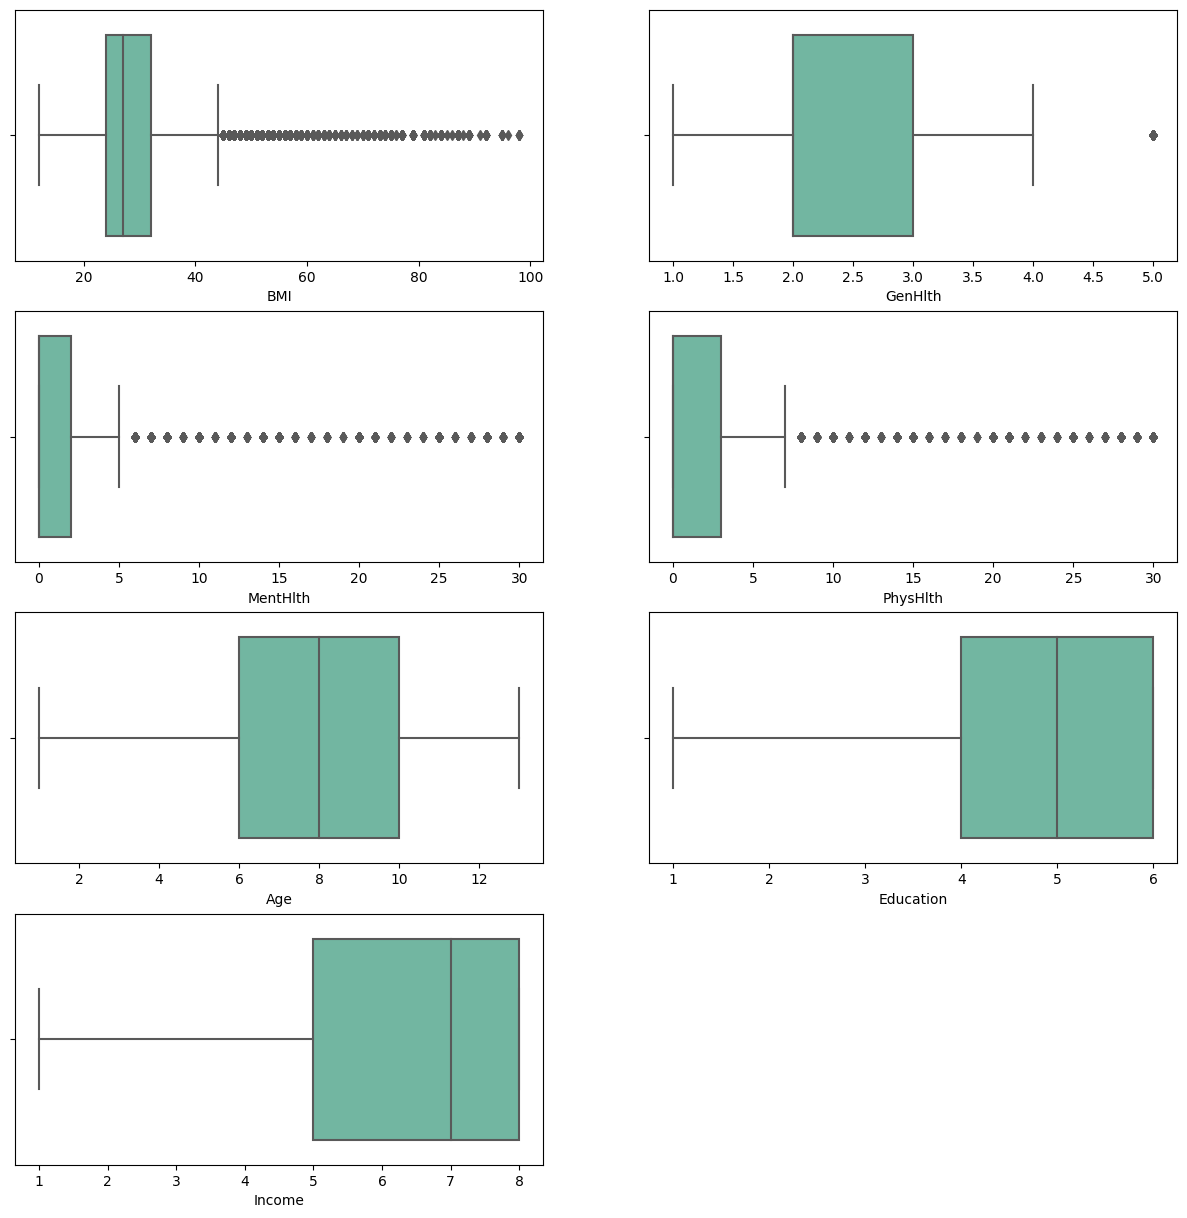

In [12]:
# Checking for outliers
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

>- We decided to retain the outliers as they are a true representation of real world Health data

# Exploratory Data Analysis

### 1. Univariate Analysis

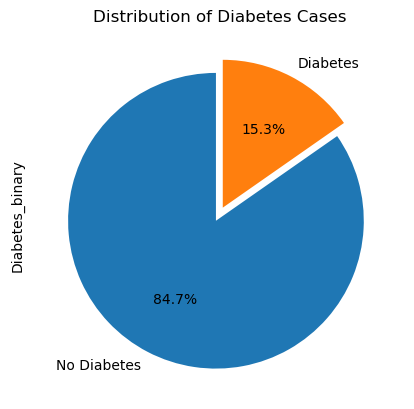

In [24]:
#distribution of diabetes
df['Diabetes_binary'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%' ,startangle=90)
plt.title('Distribution of Diabetes Cases')
plt.show()

In [25]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2. Bivariate Analysis

Here we are checking for the relationship between various features and our target variable

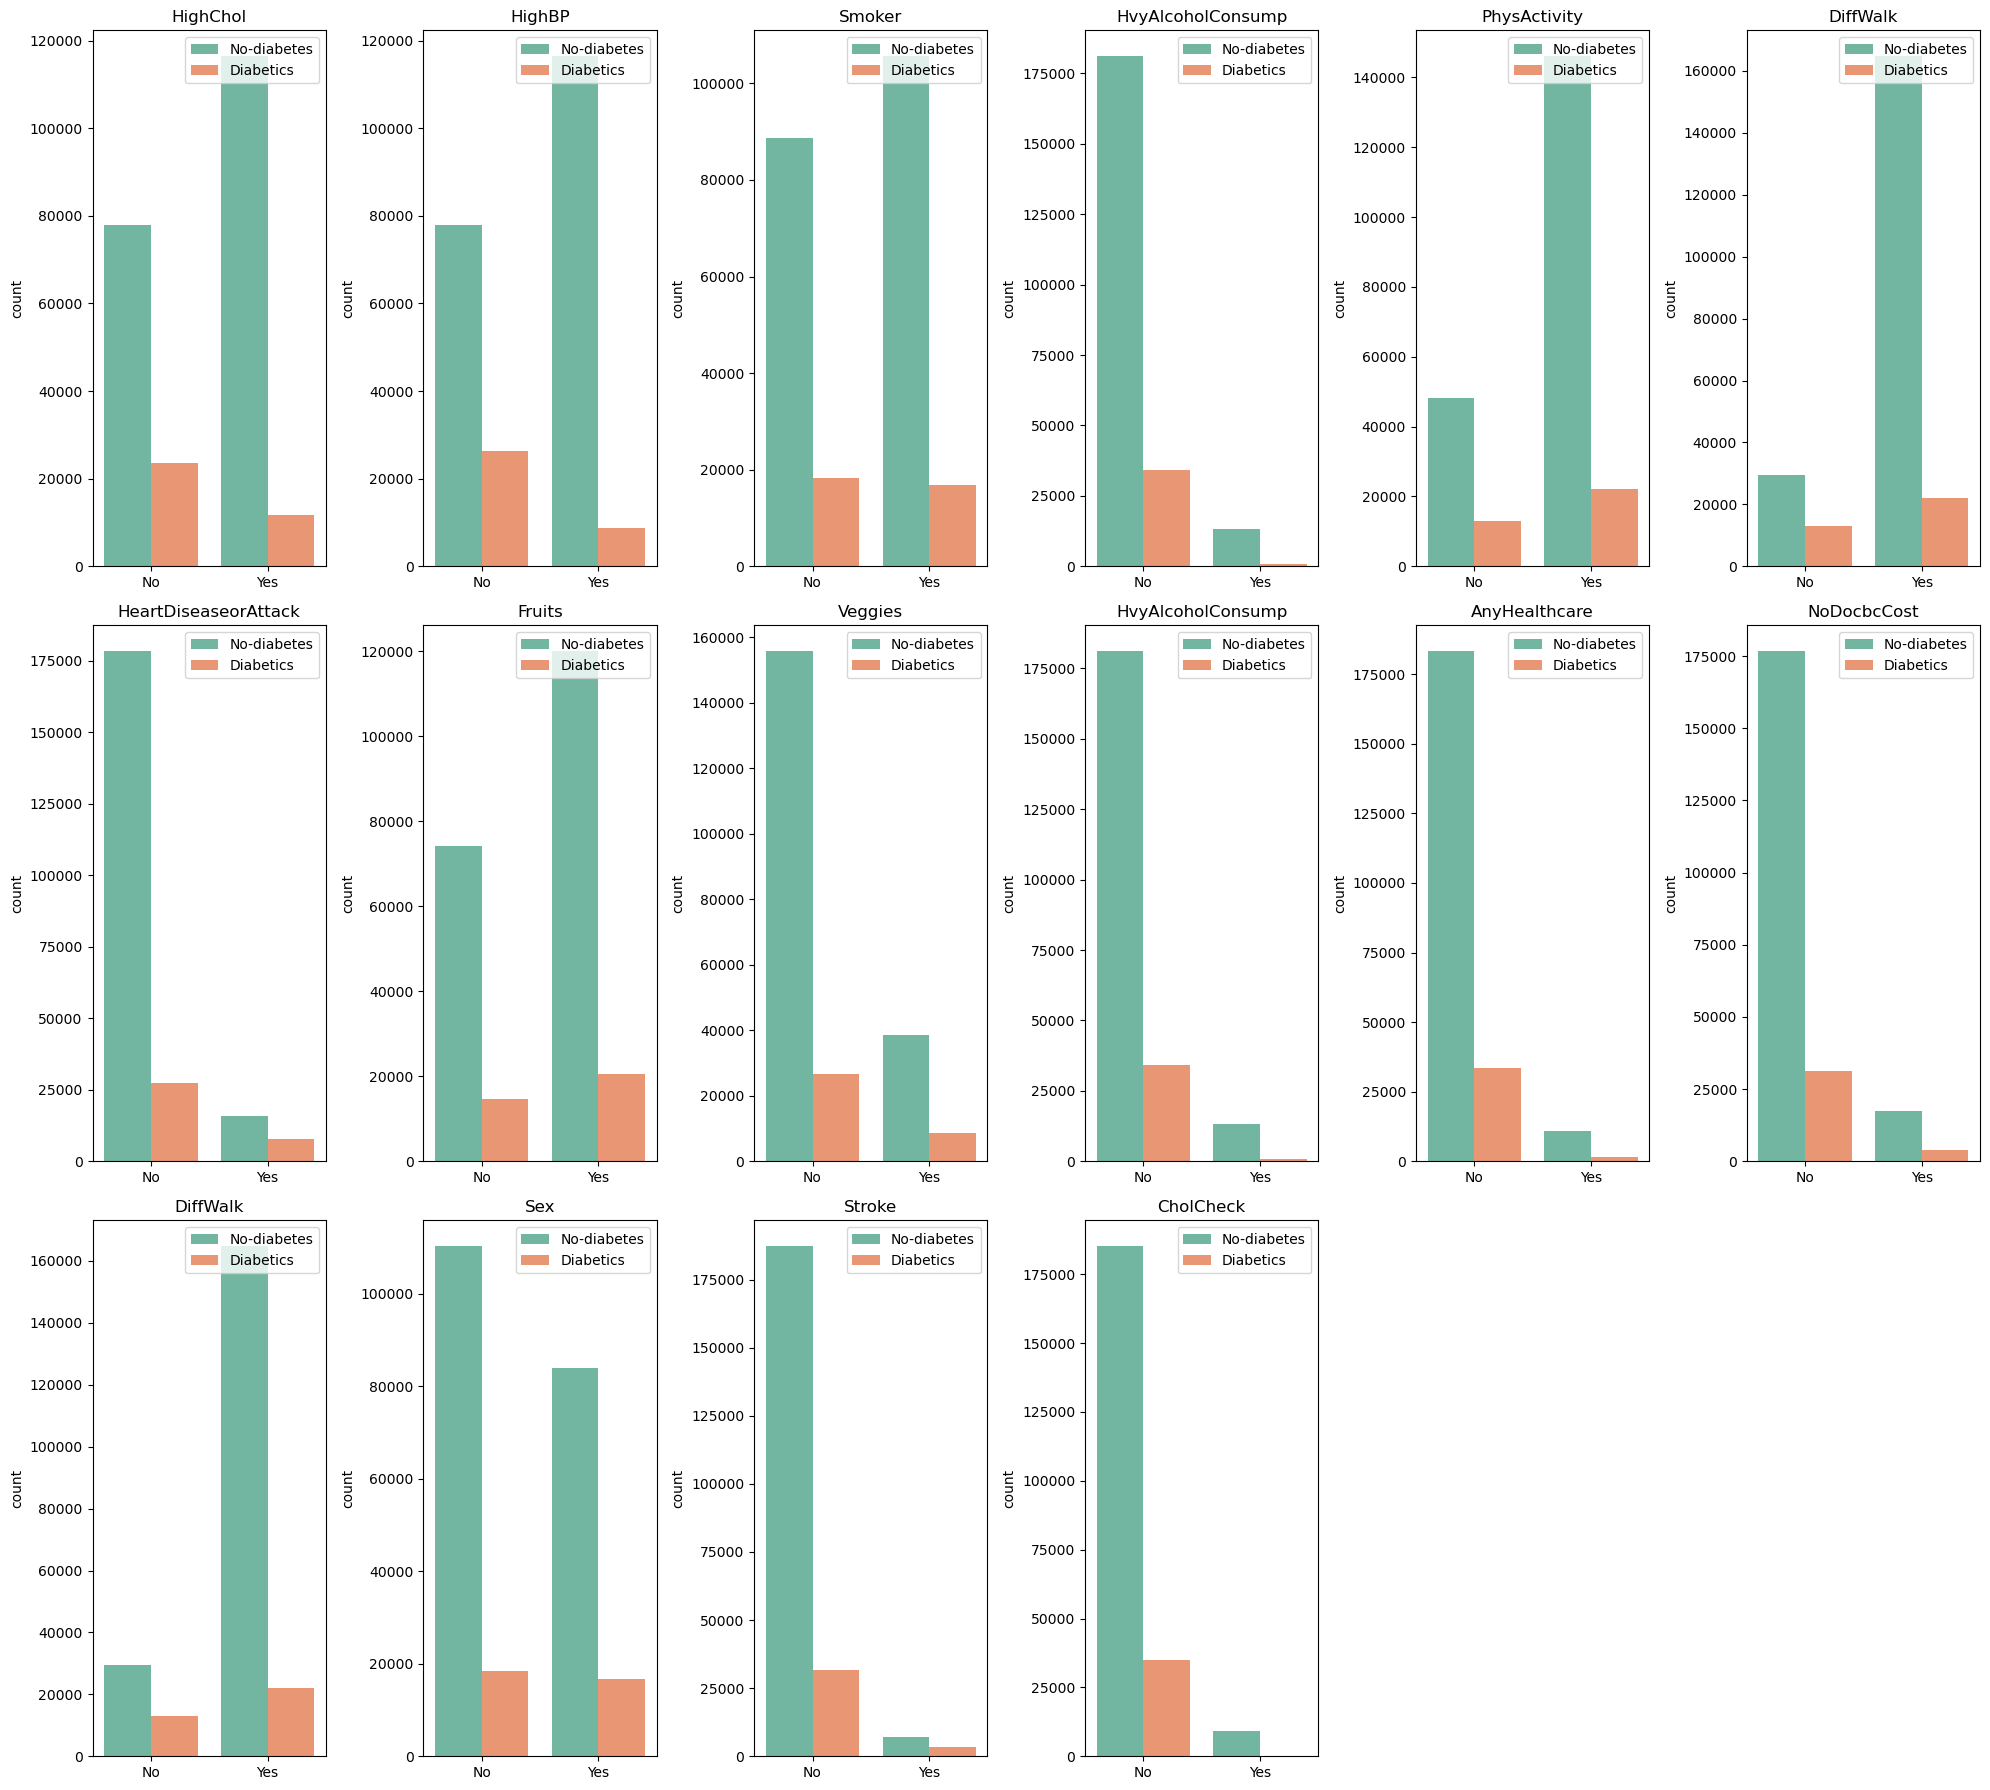

In [26]:
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk', 'HeartDiseaseorAttack',
             'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Stroke' ,'CholCheck',]

# Create the subplots and axes objects
fig, axes = plt.subplots(3, 6, figsize=(20, 18))

# Flatten the axes array so that we can iterate through the subplots
axes = axes.flatten()

# Loop through each column and create the countplot
for i, col_name in enumerate(col_names):
    ax = sns.countplot(data=df, x=col_name, hue='Diabetes_binary', palette='Set2', ax=axes[i])
    ax.set_title('{}'.format(col_name))
    ax.set_xlabel(None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['No-diabetes', 'Diabetics'])
    plt.xticks(rotation=45)

# Remove any unused subplots
for j in range(len(col_names), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the above graph we can note that the number of people with no high blood pressure are less affected by diabetes compared to the number of people who have high blood pressure.

From the above graph we can note that the number of people with no high cholesterol are less affected by diabetes compared to the number of people who have high cholesterol.

From the bar graph above its evident that smoking has less impact on diabetes contraction

It's inconclusive to say that people who do not have stroke are more likely to contact diabetes because there is an imbalance in the stroke column.

We can note that people who engage in physical activities had a slightly larger number of people with diabetes compared to people who do not engage in the same.

From the graph, we can denote that people who are overweight(have a BMI of more than 25.0) are more prone to get infected with diabetes.

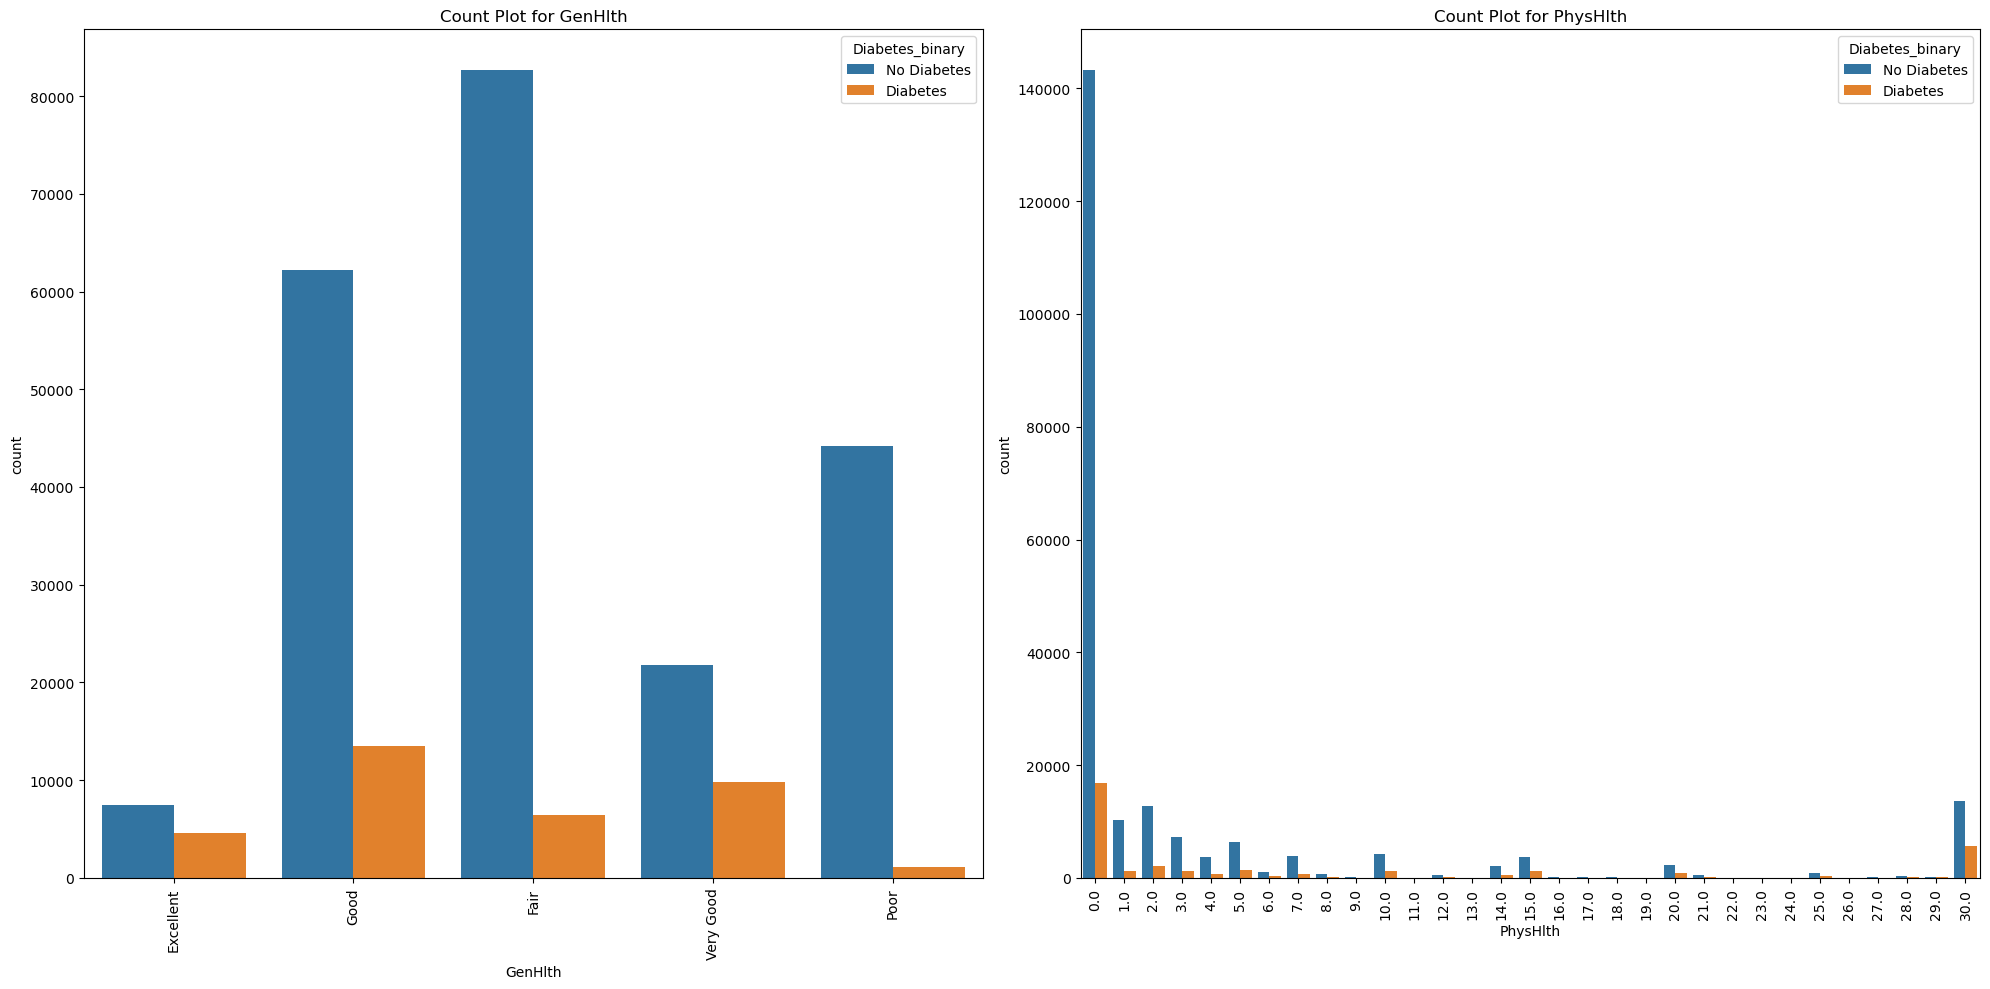

In [42]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Plot the first count plot on the first subplot
ax1 = axes[0]
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=df, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Count Plot for GenHlth')
# Plot the second count plot on the second subplot
ax2 = axes[1]
sns.countplot(x='PhysHlth', hue='Diabetes_binary', data=df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Count Plot for PhysHlth')
# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
# Show the combined plot
plt.show()

Drawing conclusions about the relationship between the two variables (Mental Health and Diabetes) requires more rigorous analysis and interpretation of the data, beyond just looking at the count of individuals in different groups. Therefore, it is essential to conduct proper statistical analysis before making any definitive statements about the relationship between Menthlth and the likelihood of contracting diabetes.

So at this point we cant really say that the people who didnt experience a mental break down on a scale of 30 days are more likely to have diabetes compared to people who had more mental breakdown cases

Looking at the PhysHlth it also needs further investigation to get insight from the data

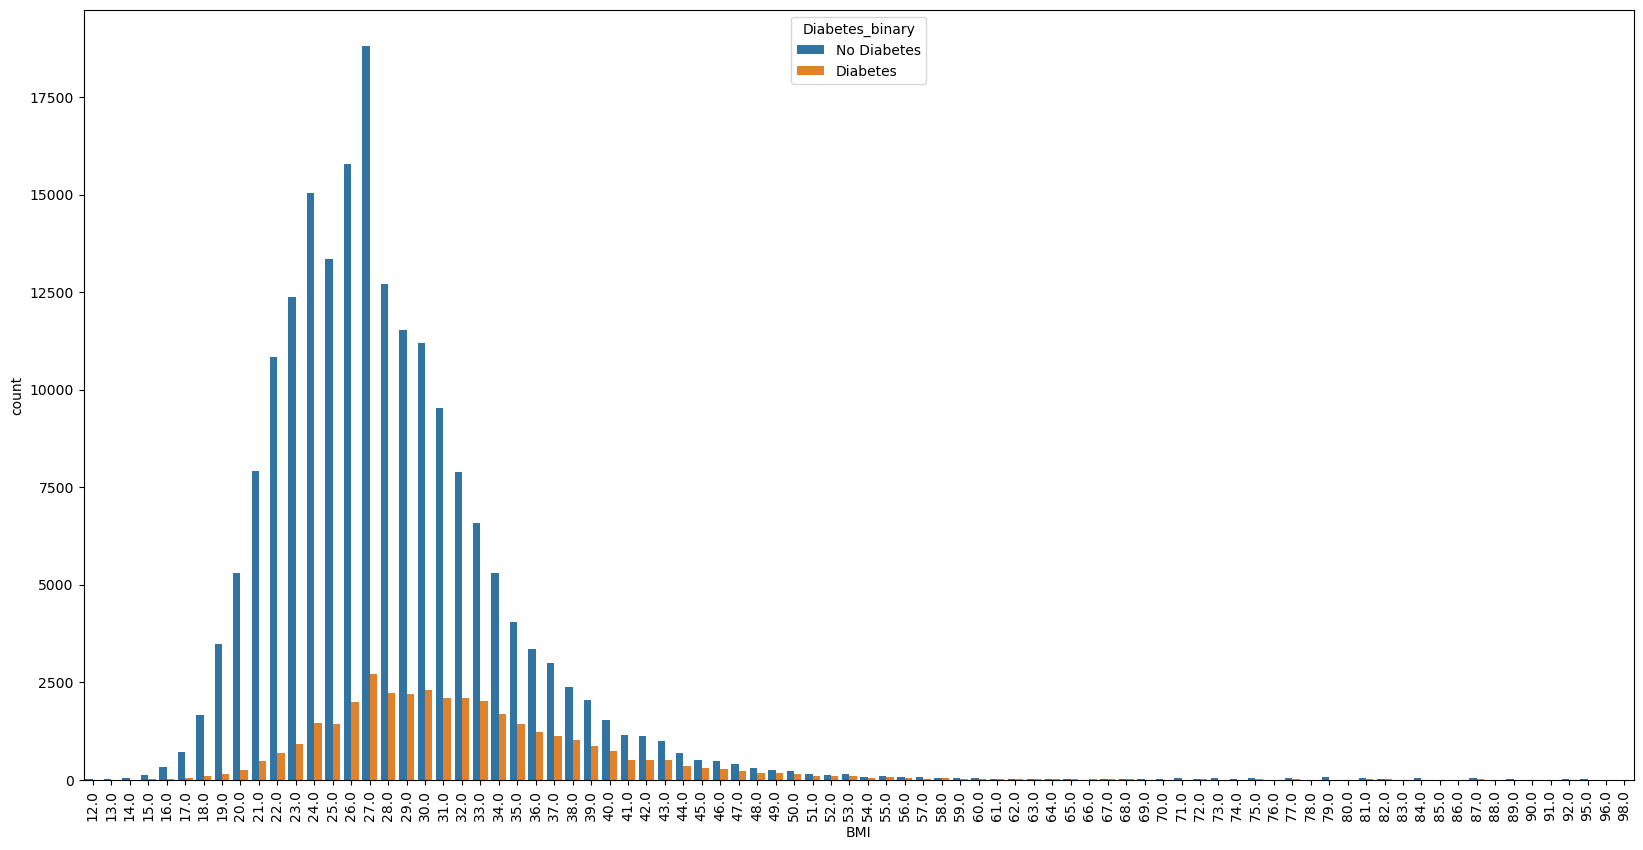

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='BMI', hue='Diabetes_binary', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

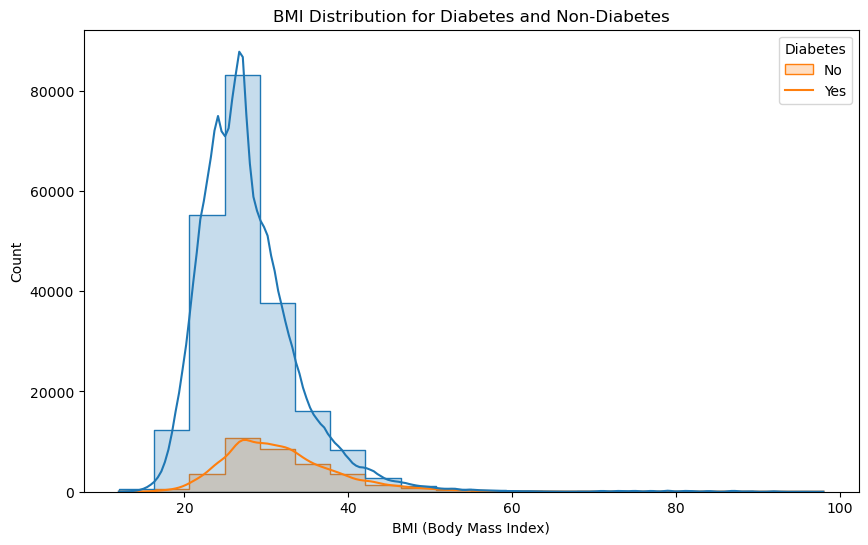

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='Diabetes_binary', element='step', bins=20, kde=True)
plt.xlabel('BMI (Body Mass Index)')
plt.title('BMI Distribution for Diabetes and Non-Diabetes')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()

The graph clearly shows that people with a BMI (Body Mass Index) greater than 25.0 are at a higher risk of having diabetes. In simpler terms, being overweight significantly increases the chances of developing diabetes. This means that taking steps to maintain a healthy BMI can play a crucial role in reducing the risk of diabetes.

<Figure size 2000x1000 with 0 Axes>

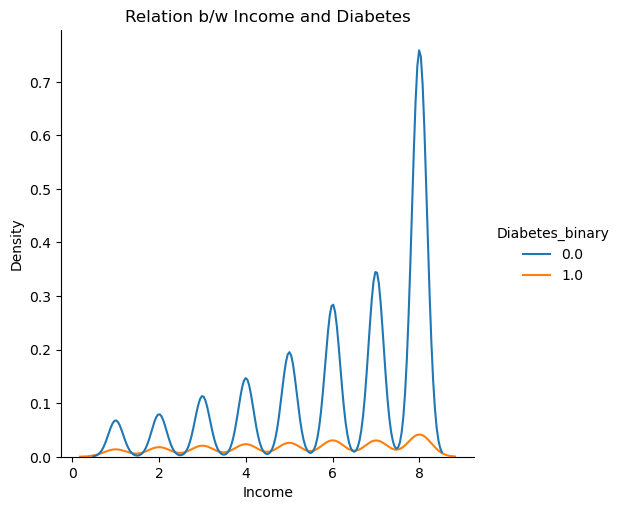

In [53]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="Income", hue="Diabetes_binary", kind="kde")
plt.title("Relation b/w Income and Diabetes");

The graph highlights a significant relationship between income level and health status. The majority of individuals fall into the higher income category, and within this group, a noticeable proportion of people are shown to be in good health. This suggests that there is a positive correlation between income and health, meaning that as income increases, the likelihood of individuals being in good health also tends to rise.

This association could be attributed to various factors such as better access to healthcare, improved nutrition, a more comfortable lifestyle, and increased opportunities for physical activity. However, it's crucial to acknowledge that correlation does not imply causation, and other variables may also influence this connection, including education, occupation, and lifestyle choices.

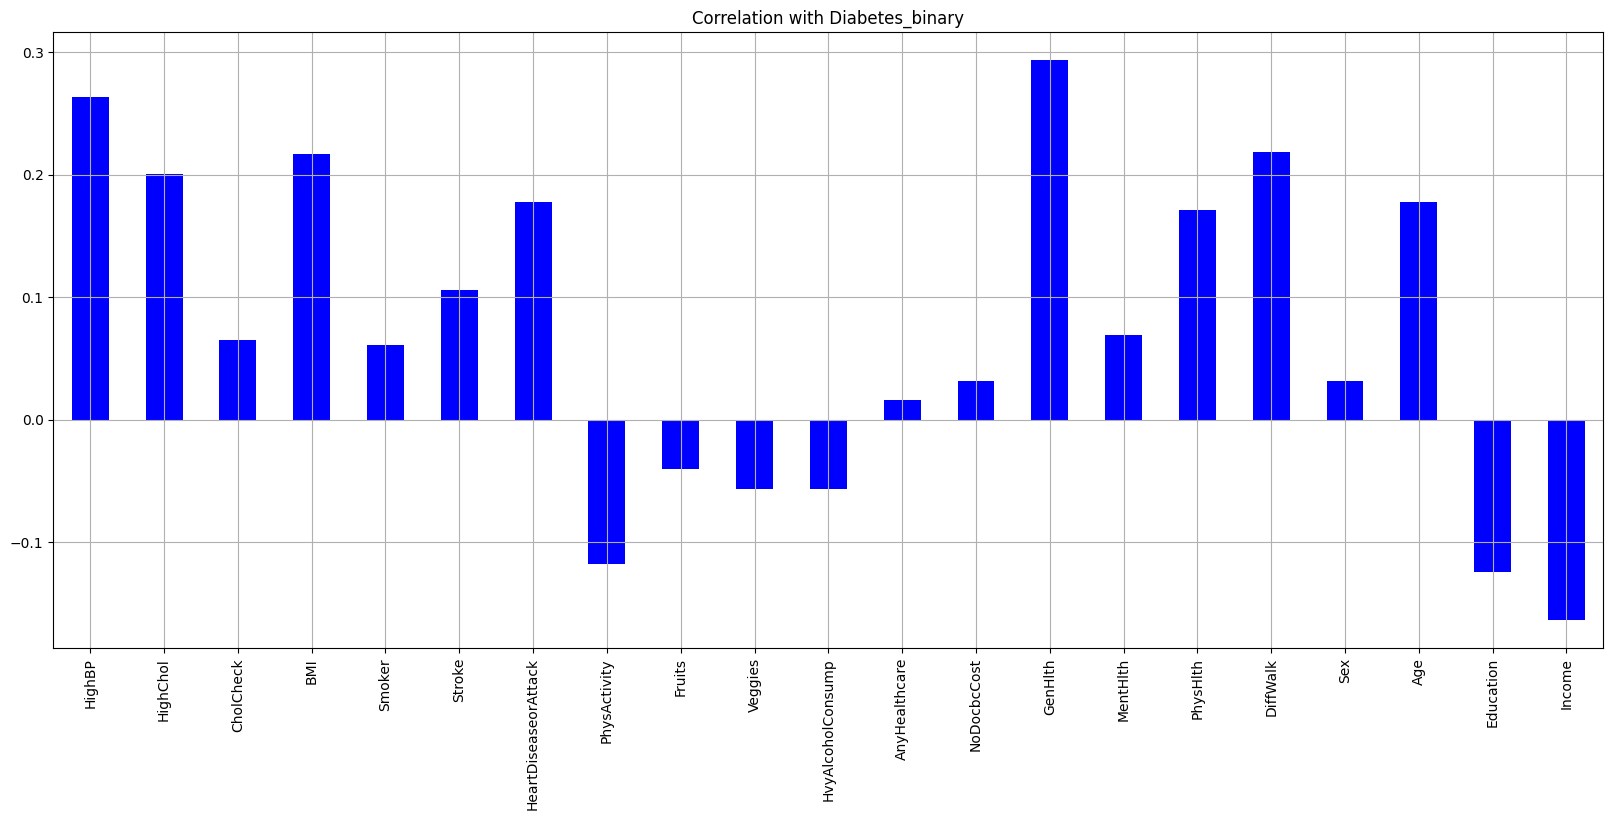

In [2]:
 df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
 , title="Correlation with Diabetes_binary",color="Blue");

# MODELING

In [6]:
X = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']

In [7]:
def train_and_evaluate_model(X, y, model, scaler=None, param_grid=None):

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the scaling steps
    if scaler is not None:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    # Add SMOTE to the pipeline
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Fit the classifier on the training data
    if param_grid is not None:
        # Create the GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=1)
        grid_search.fit(X_train_resampled, y_train_resampled)
        # Use the best model from the grid search
        model = grid_search.best_estimator_

        # Print the best hyperparameters, best score, and best estimator
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        best_estimator = grid_search.best_estimator_
        print("Best Hyperparameters:", best_params)
        print("Best ROC-AUC Score:", best_score)
        print("Best Estimator:", best_estimator)

        # Fit the best model on the full training data
        model.fit(X_train_resampled, y_train_resampled)
    else:
        # If no hyperparameter tuning, simply fit the model on the training data
        model.fit(X_train_resampled, y_train_resampled)

    # Predictions on the training and test sets
    y_pred_train = model.predict(X_train_resampled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate the ROC AUC score
    train_roc_auc = roc_auc_score(y_train_resampled, y_pred_train)
    test_roc_auc = roc_auc_score(y_test, y_pred_test)

    # Print the ROC AUC score
    print("Train ROC AUC Score:", train_roc_auc)
    print("Test ROC AUC Score:", test_roc_auc)
    print("\n")

    # Classification report for both train and test sets
    print("Classification Report (Training Set):")
    print(classification_report(y_train_resampled, y_pred_train))
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix for both train and test sets
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # Plot normalized confusion matrix for the training set
    ax1 = axes[0]
    cm_train = confusion_matrix(y_train_resampled, y_pred_train)
    cm_train_norm = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=model.classes_)
    disp_train.plot(cmap=plt.cm.Blues, ax=ax1, values_format='.2f')
    ax1.set_title('Confusion Matrix (Training Set)')

    # Plot normalized confusion matrix for the test set
    ax2 = axes[1]
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_test_norm = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=model.classes_)
    disp_test.plot(cmap=plt.cm.Blues, ax=ax2, values_format='.2f')
    ax2.set_title('Confusion Matrix (Test Set)')

    plt.tight_layout()
    plt.show()

    # Feature importances (for XGBClassifier)
    if isinstance(model, XGBClassifier):
        feature_importances = model.feature_importances_
        feature_names = X.columns.tolist()

        # Create a dictionary mapping feature names to importances
        feature_importance_dict = dict(zip(feature_names, feature_importances))

        # Sort the features by importance (descending order)
        sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

        # Print the important features
        print("Important Features:")
        for feature, importance in sorted_features:
            print(f"{feature}: {importance}")

        # Plot feature importances
        features, importances = zip(*sorted_features)
        plt.figure(figsize=(10, 10))
        plt.barh(range(len(features)), importances, align='center')
        plt.yticks(range(len(features)), features)
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.title('Feature Importances')
        plt.show()

    # Return the trained model
    return model, X_test_scaled, y_test

## Logistic Regression

Train ROC AUC Score: 0.7394448587076702
Test ROC AUC Score: 0.7308680144717827


Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73    155564
         1.0       0.73      0.77      0.75    155564

    accuracy                           0.74    311128
   macro avg       0.74      0.74      0.74    311128
weighted avg       0.74      0.74      0.74    311128

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38813
         1.0       0.32      0.75      0.45      7082

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.84      0.72      0.76     45895



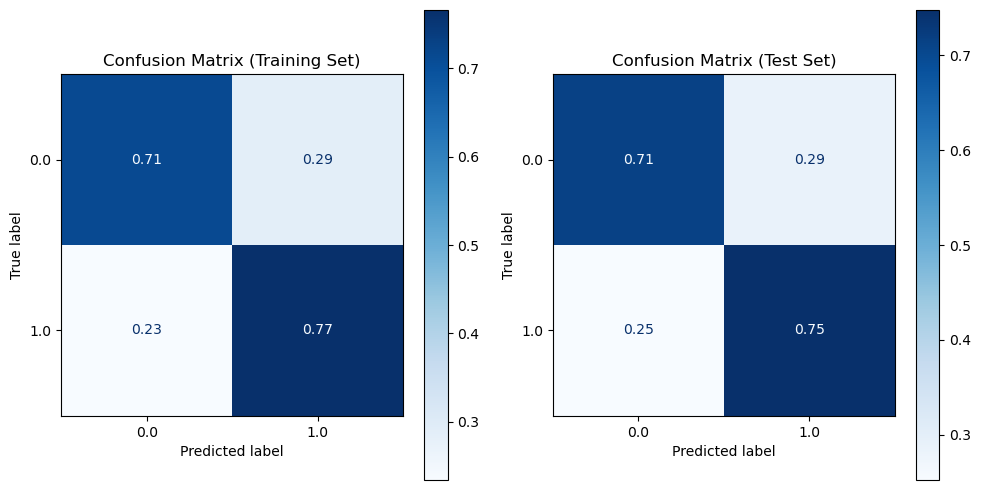

(LogisticRegression(random_state=100),
 array([[-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
          1.02723508,  1.00910292],
        [-0.91213911, -0.88846702,  0.20496012, ...,  1.58887304,
          0.02002041, -0.90187403],
        [-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
         -0.98719426, -0.90187403],
        ...,
        [ 1.096324  ,  1.12553418,  0.20496012, ..., -0.02610654,
          1.02723508,  1.00910292],
        [-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
          1.02723508, -1.37961826],
        [ 1.096324  , -0.88846702,  0.20496012, ...,  0.29688937,
          1.02723508,  1.00910292]]),
 218137    0.0
 234092    0.0
 220499    0.0
 133305    0.0
 1394      0.0
          ... 
 206612    0.0
 52091     0.0
 153261    0.0
 252194    0.0
 191657    0.0
 Name: Diabetes_binary, Length: 45895, dtype: float64)

In [8]:
# Instantiate the classifier
logreg = LogisticRegression(random_state=100)

# Instantiate a Scaler
scaler = StandardScaler()

# Call the function with the classifier
train_and_evaluate_model(X, y, logreg, scaler)

## Hyperparameter Tuning

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC Score: 0.8130169905292325
Best Estimator: LogisticRegression(C=0.001, random_state=110, solver='liblinear')
Train ROC AUC Score: 0.7395187832660512
Test ROC AUC Score: 0.7315127961366805


Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73    155564
         1.0       0.73      0.77      0.75    155564

    accuracy                           0.74    311128
   macro avg       0.74      0.74      0.74    311128
weighted avg       0.74      0.74      0.74    311128

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38813
         1.0       0.32      0.75      0.45      7082

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63  

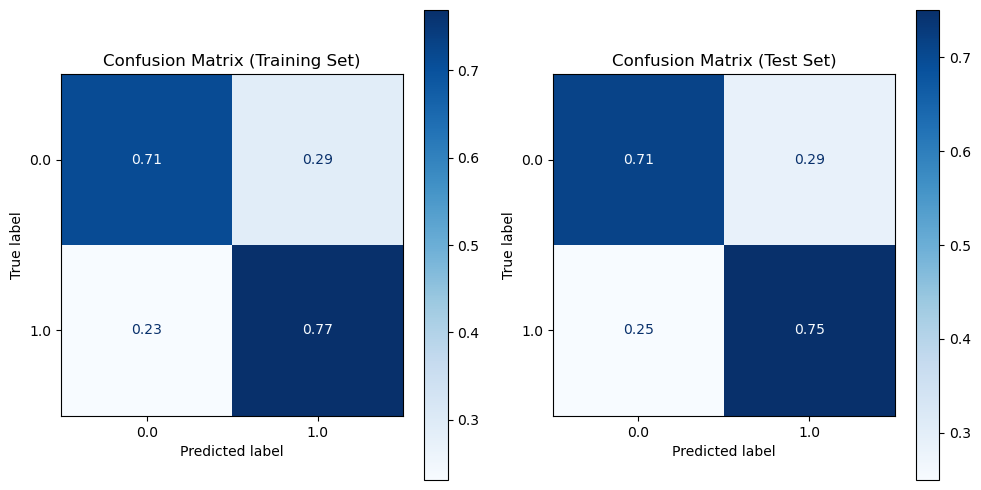

In [9]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Instantiate the model
logreg_tuned = LogisticRegression(random_state=110)

# Instantiate a Scaler
scaler = StandardScaler()

# Train and evaluate the model with grid search
model, X_test_scaled, y_test = train_and_evaluate_model(X, y, logreg_tuned, scaler, param_grid)

The hyperparameter tuning process resulted in the best hyperparameters for the logistic regression model:

Regularization strength (C): 0.001
Penalty (penalty): L2 (Ridge regularization)
Solver (solver): 'liblinear'
The model achieved a ROC AUC score of 0.8130 on the validation set using these hyperparameters, indicating a good ability to discriminate between positive and negative classes.

Train ROC AUC Score: 0.7395
Test ROC AUC Score: 0.7315

The model's ROC AUC scores on the training and test sets are approximately 0.7395 and 0.7315, respectively. The model performs slightly better on the training set compared to the test set, but the scores are relatively close, suggesting the model's generalization is acceptable.


Overall, the logistic regression model with the best hyperparameters performs decently on the dataset. 

## Decision Tree

Train ROC AUC Score: 0.9968341004345478
Test ROC AUC Score: 0.5867262035207111


Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    155564
         1.0       1.00      0.99      1.00    155564

    accuracy                           1.00    311128
   macro avg       1.00      1.00      1.00    311128
weighted avg       1.00      1.00      1.00    311128

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     38813
         1.0       0.28      0.32      0.30      7082

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895



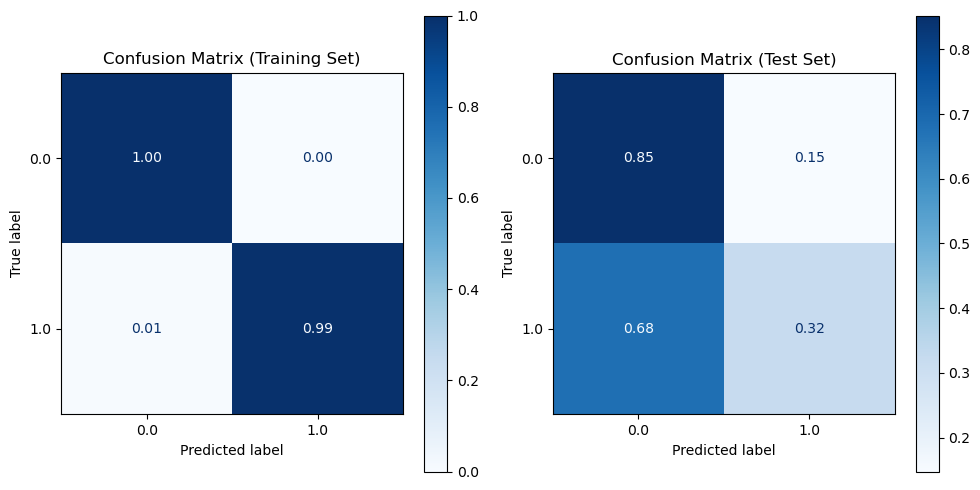

(DecisionTreeClassifier(random_state=100),
 array([[-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
          1.02723508,  1.00910292],
        [-0.91213911, -0.88846702,  0.20496012, ...,  1.58887304,
          0.02002041, -0.90187403],
        [-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
         -0.98719426, -0.90187403],
        ...,
        [ 1.096324  ,  1.12553418,  0.20496012, ..., -0.02610654,
          1.02723508,  1.00910292],
        [-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
          1.02723508, -1.37961826],
        [ 1.096324  , -0.88846702,  0.20496012, ...,  0.29688937,
          1.02723508,  1.00910292]]),
 218137    0.0
 234092    0.0
 220499    0.0
 133305    0.0
 1394      0.0
          ... 
 206612    0.0
 52091     0.0
 153261    0.0
 252194    0.0
 191657    0.0
 Name: Diabetes_binary, Length: 45895, dtype: float64)

In [10]:
# Instantiate the classifier
dec_tree = DecisionTreeClassifier(random_state=100)

# Instantiate a Scaler
scaler = StandardScaler()

# Call the function with the classifier
train_and_evaluate_model(X, y, dec_tree, scaler)

## Hyperparameter Tuning

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best ROC-AUC Score: 0.9080400017640654
Best Estimator: DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6,
                       random_state=10)
Train ROC AUC Score: 0.8351160936977706
Test ROC AUC Score: 0.6908271289254752


Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83    155564
         1.0       0.82      0.86      0.84    155564

    accuracy                           0.84    311128
   macro avg       0.84      0.84      0.84    311128
weighted avg       0.84      0.84      0.84    311128

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86     38813
         1.0       0.36      0.57      0.44      7082

    accuracy  

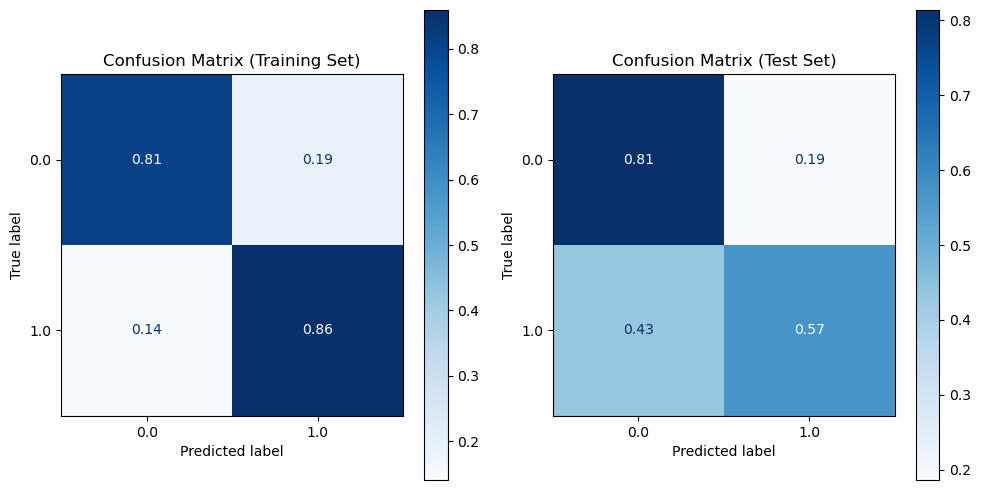

In [11]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3, 11],
    'min_samples_split': [ 4, 6],
    'min_samples_leaf': [1, 2]
}

# Instantiate the classifier
dec_tree_tuned = DecisionTreeClassifier(random_state=10)

# Train and evaluate the model with grid search
model, X_test_scaled, y_test = train_and_evaluate_model(X, y, dec_tree_tuned, scaler, param_grid)

The hyperparameter tuning process found the best hyperparameters for the Decision Tree classifier. The best hyperparameters are:
* Splitting criterion (criterion): 'gini' (measures the quality of a split based on Gini impurity).
* Maximum depth of the tree (max_depth): 11 (the maximum depth of the decision tree is limited to avoid overfitting).
* Minimum number of samples required to be at a leaf node (min_samples_leaf): 2 (ensures that each leaf node has at least two samples).
* Minimum number of samples required to split an internal node (min_samples_split): 6 (sets a threshold for the minimum number of samples required to split a node).
* Best ROC-AUC Score: 0.9080

The best ROC-AUC score achieved during the hyperparameter tuning process is 0.9080. The ROC-AUC score measures the area under the Receiver Operating Characteristic (ROC) curve and provides an indication of the classifier's ability to discriminate between positive and negative samples. A higher ROC-AUC score indicates better performance.

Best Estimator: DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6, random_state=10)

The ROC-AUC score on the training set is 0.8351. This indicates that the Decision Tree classifier achieved a good level of discrimination between positive and negative samples during training.

The ROC-AUC score on the test set is 0.6908. 

Overall, the Decision Tree classifier achieved good performance on the training set, with high precision, recall, and F1-score for both classes.

## Random Forest

Train ROC AUC Score: 0.996824458100846
Test ROC AUC Score: 0.6028136904173279


Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    155564
         1.0       1.00      1.00      1.00    155564

    accuracy                           1.00    311128
   macro avg       1.00      1.00      1.00    311128
weighted avg       1.00      1.00      1.00    311128

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     38813
         1.0       0.44      0.27      0.33      7082

    accuracy                           0.83     45895
   macro avg       0.66      0.60      0.62     45895
weighted avg       0.81      0.83      0.82     45895



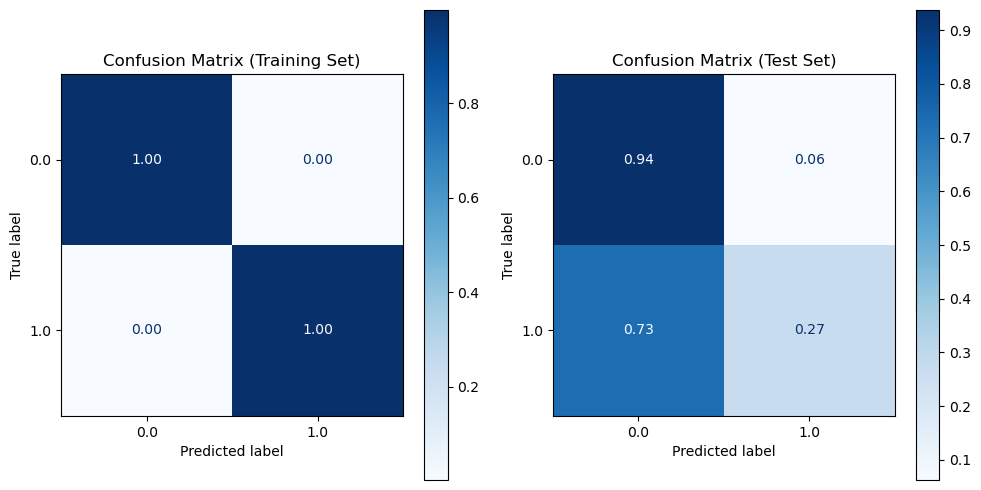

(RandomForestClassifier(random_state=100),
 array([[-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
          1.02723508,  1.00910292],
        [-0.91213911, -0.88846702,  0.20496012, ...,  1.58887304,
          0.02002041, -0.90187403],
        [-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
         -0.98719426, -0.90187403],
        ...,
        [ 1.096324  ,  1.12553418,  0.20496012, ..., -0.02610654,
          1.02723508,  1.00910292],
        [-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
          1.02723508, -1.37961826],
        [ 1.096324  , -0.88846702,  0.20496012, ...,  0.29688937,
          1.02723508,  1.00910292]]),
 218137    0.0
 234092    0.0
 220499    0.0
 133305    0.0
 1394      0.0
          ... 
 206612    0.0
 52091     0.0
 153261    0.0
 252194    0.0
 191657    0.0
 Name: Diabetes_binary, Length: 45895, dtype: float64)

In [12]:
# Instantiate the classifier
RF = RandomForestClassifier(random_state=100)

# Instantiate a Scaler
scaler = StandardScaler()

# Call the function with the classifier
train_and_evaluate_model(X, y, RF, scaler)

## Hyperparameter Tuning

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}
Best ROC-AUC Score: 0.9112363706047096
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=300, n_jobs=-1, random_state=30)
Train ROC AUC Score: 0.8336729577537219
Test ROC AUC Score: 0.7116523996154656


Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83    155564
         1.0       0.82      0.86      0.84    155564

    accuracy                           0.83    311128
   macro avg       0.83      0.83      0.83    311128
weighted avg       0.83      0.83      0.83    311128

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     38813
         1.0       0.37      0.62      0

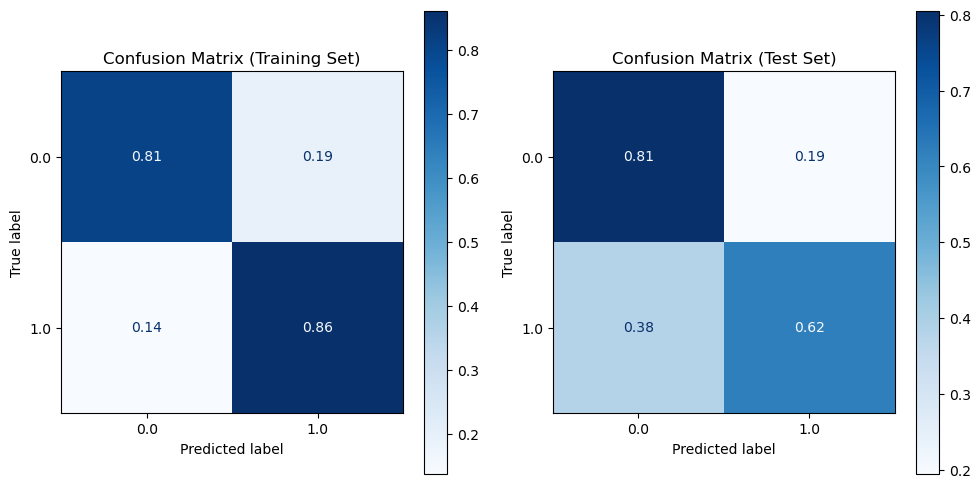

In [14]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [300, 200],
    'max_depth': [5, 10],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 3]
    
}

# Instantiate the model
RF_tuned = RandomForestClassifier(n_jobs=-1, random_state=30)

# Train and evaluate the model with grid search
model, X_test_scaled, y_test = train_and_evaluate_model(X, y, RF_tuned, scaler, param_grid)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}


The ROC-AUC score on the training set is 0.8337. This indicates that the Random Forest classifier achieved a good level of discrimination between positive and negative samples during training.

The ROC-AUC score on the test set is 0.7117. It measures the classifier's performance on unseen data.

Overall, the Random Forest classifier achieved good performance on the training set, with high precision, recall, and F1-score for both classes. 

## XGBoost

Train ROC AUC Score: 0.9172430639479571
Test ROC AUC Score: 0.5786095984182057


Classification Report (Training Set):
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    155564
         1.0       0.97      0.86      0.91    155564

    accuracy                           0.92    311128
   macro avg       0.92      0.92      0.92    311128
weighted avg       0.92      0.92      0.92    311128

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     38813
         1.0       0.56      0.18      0.28      7082

    accuracy                           0.85     45895
   macro avg       0.71      0.58      0.60     45895
weighted avg       0.82      0.85      0.82     45895



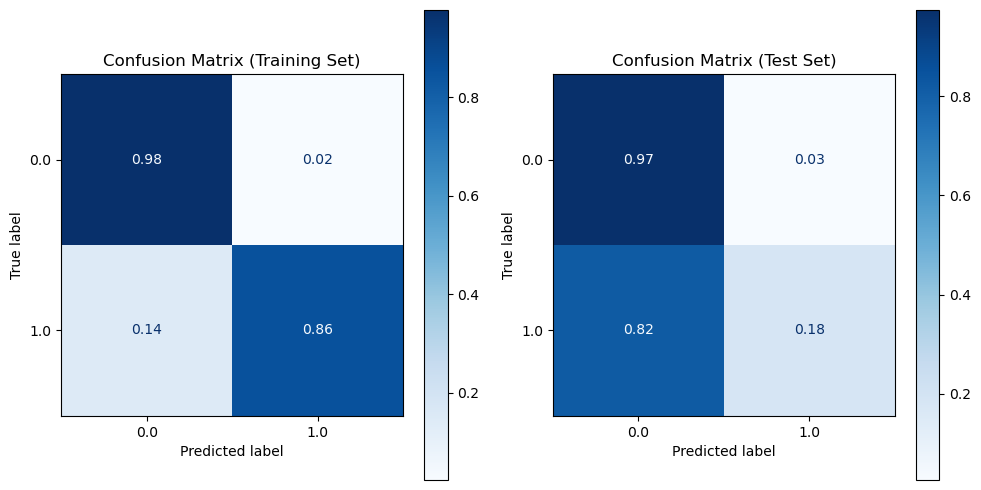

Important Features:
GenHlth: 0.21163763105869293
HighBP: 0.17296110093593597
Age: 0.14745593070983887
BMI: 0.09079106152057648
Income: 0.08824191987514496
HighChol: 0.0737064853310585
HvyAlcoholConsump: 0.039213716983795166
CholCheck: 0.03621519356966019
PhysHlth: 0.03602210432291031
MentHlth: 0.02570348046720028
Education: 0.0217365063726902
Sex: 0.018734777346253395
HeartDiseaseorAttack: 0.006115670315921307
Smoker: 0.004984469618648291
Fruits: 0.0047997902147471905
AnyHealthcare: 0.00406239926815033
Veggies: 0.003892280627042055
PhysActivity: 0.0038344827480614185
DiffWalk: 0.0035810067784041166
Stroke: 0.003414413658902049
NoDocbcCost: 0.002895598066970706


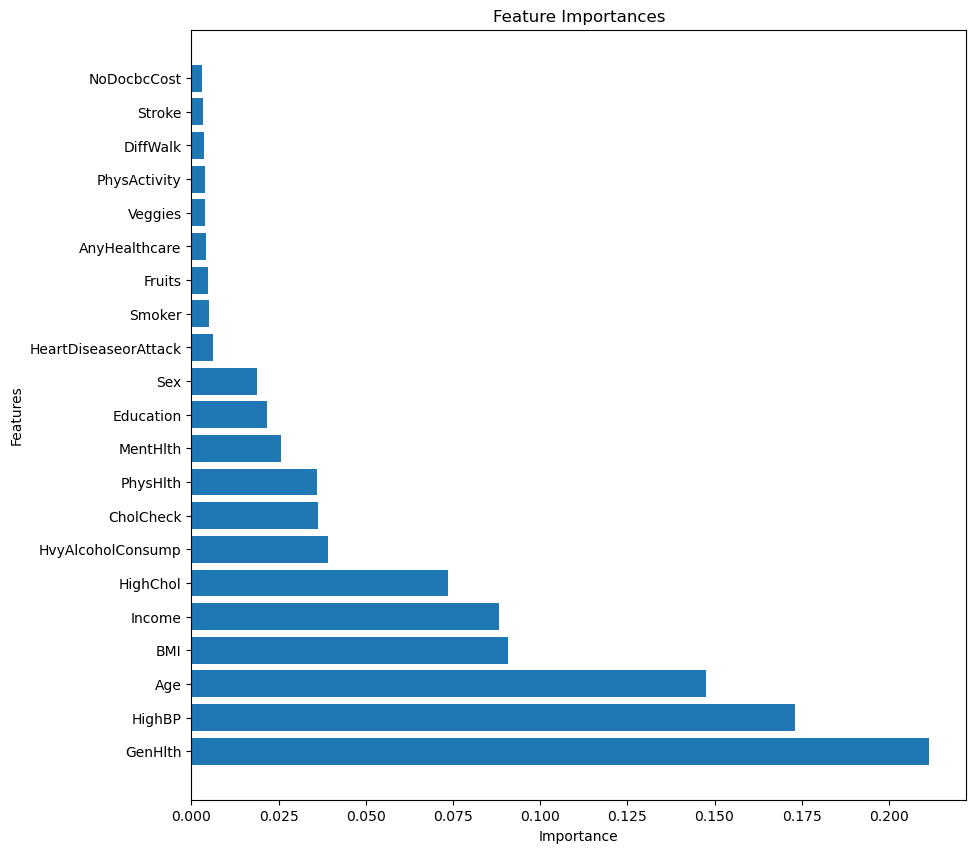

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=4, ...),
 array([[-0.91213911, -0.88846702,  0.20496012, ...,  0.61988529,
          1.02723508,  1.00910292],
        [-0.91213911, -0.88846702,  0.20496012, ...,  1.58887304,
          0.02002041, -0.90187403],
        [-0.91213911, -0.88846702, 

In [15]:
# Instantiate the classifier
xgb = XGBClassifier(random_state=4)

# Call the function with the classifier
train_and_evaluate_model(X, y, xgb, scaler)

## Hyperparameter Tuning

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Best ROC-AUC Score: 0.9616931220011368
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=40, ...)
Train ROC AUC Score: 0.9161438379059423
Test ROC AUC Score:

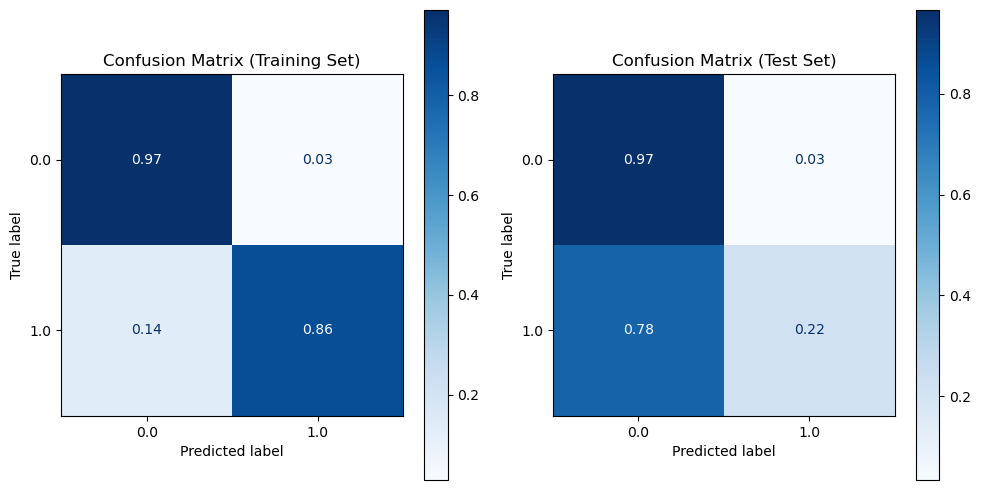

Important Features:
GenHlth: 0.2537505328655243
HighBP: 0.21371568739414215
Age: 0.13159078359603882
BMI: 0.08597471565008163
Income: 0.06585146486759186
HighChol: 0.05448197200894356
CholCheck: 0.04296337068080902
PhysHlth: 0.03352616727352142
HvyAlcoholConsump: 0.030378282070159912
Education: 0.021021567285060883
MentHlth: 0.015546170063316822
Sex: 0.011216978542506695
HeartDiseaseorAttack: 0.006715261843055487
Smoker: 0.004762216005474329
Fruits: 0.004616321064531803
DiffWalk: 0.004474814515560865
PhysActivity: 0.004284074064344168
AnyHealthcare: 0.004059969913214445
Veggies: 0.003966035787016153
Stroke: 0.003695564577355981
NoDocbcCost: 0.0034079691395163536


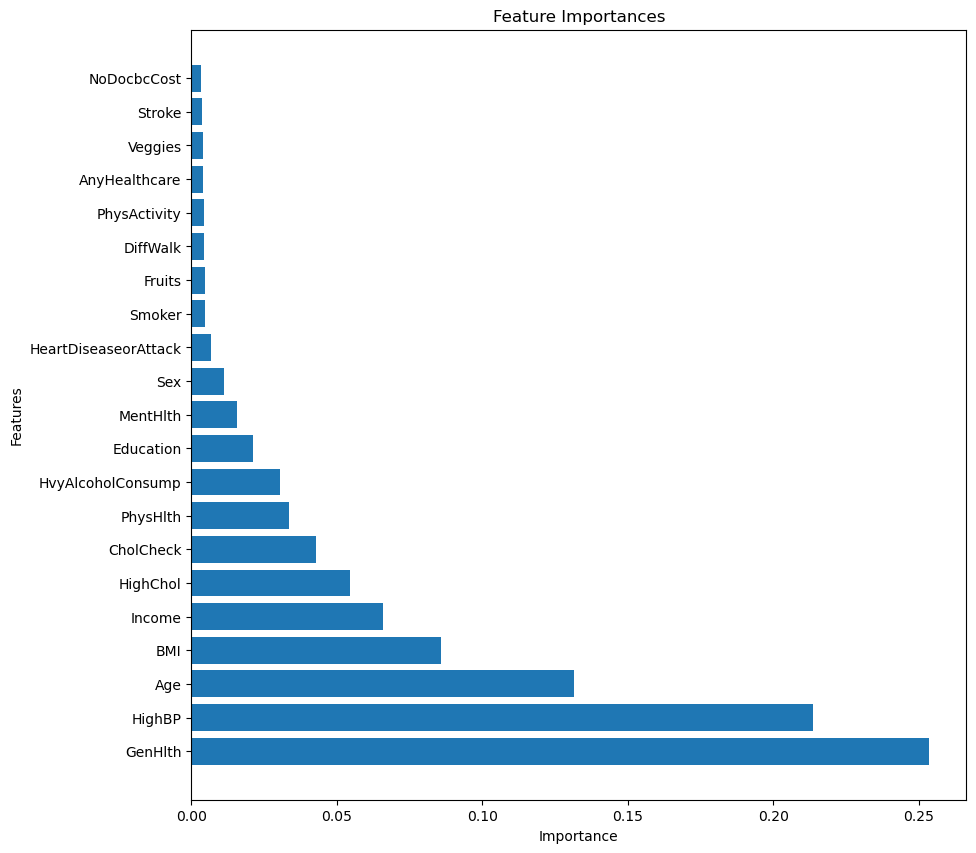

In [16]:
# Define the hyperparameters to tune

param_grid = {
    'max_depth': [7, 9],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 300] 
}

# Instantiate the model
xgb_tuned = XGBClassifier(n_jobs=-1, random_state=40)

# Train and evaluate the model with grid search
model, X_test_scaled, y_test = train_and_evaluate_model(X, y, xgb_tuned, scaler, param_grid)

The ROC-AUC score on the training set is 0.9161. This indicates that the XGBoost classifier achieved a high level of discrimination between positive and negative samples during training.

The ROC-AUC score on the test set is 0.5914. It measures the classifier's performance on unseen data. 

Overall, the XGBoost classifier achieved excellent performance on the dataset set, with high precision, recall, and F1-score for both classes. 

## ROC-AUC curves comparison for the models

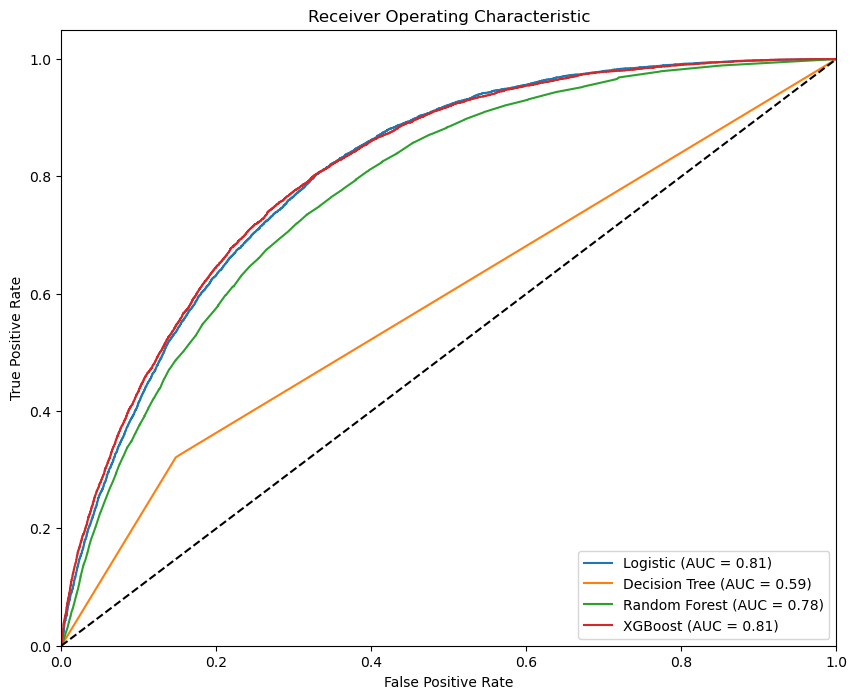

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Fit the models and make predictions
models = [logreg, dec_tree, RF, xgb]
model_names = ['Logistic', 'Decision Tree', 'Random Forest', 'XGBoost']
y_scores = []

for model in models:
    if model == logreg:
        y_scores.append(model.predict_proba(X_test_scaled)[:, 1])
    else:
        y_scores.append(model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test, y_scores[i])
    auc = roc_auc_score(y_test, y_scores[i])
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Conclusion

The best and final model is the tuned XGBoost based on the below:
- Best ROC-AUC Score from the GridSearchCV: **0.81**
 - With a score of 0.81, our model is showing a high level of discrimination ability, suggesting that it can effectively separate the positive and negative instances (diabetic cases and non-diabetic cases) based on the input features.
- Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
- Based on the `feature_importances` function of the model, we are able to get insights on the most important features that contribute to the high contraction of diabetes, and hence better predictions by our model.


Features that were the most important in predicting diabetes contraction include
- GenHlth
- HighBP
- Age
- BMI
- Income
- HighChol

In [64]:
import plotly.graph_objects as go
# Define a function to generate the plots for the important features
def create_diabetes_rate_plot(feature, target, data, x_label, y_label, plot_title,
                                 x_tick_labels=None, plot_width=700, plot_height=500):
    mean_diabetes_rate = data.groupby(feature)[target].mean().reset_index()
    # Define a list of colors to assign to each category
   colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'darkturquoise','beige',' aliceblue']
    fig = go.Figure(data=[
        go.Bar(
            x= mean_diabetes_rate[feature],
            y= mean_diabetes_rate[target],
            marker=dict(
                color=colors[:len( mean_diabetes_rate[feature])],
                line=dict(width=1, color='black')
            ),
            textposition='none'
        )
    ])
    fig.update_layout(
        title=plot_title,
        xaxis=dict(title=x_label, ticktext=x_tick_labels, tickvals= mean_diabetes_rate[feature]),
        yaxis=dict(title=y_label),
        showlegend=False,
        width=plot_width,
        height=plot_height
    )
    return fig

In [66]:
fig = create_diabetes_rate_plot('GenHlth', 'Diabetes_binary', df,
                                   'General Health',
                                   'Mean Diabetes Rate',
                                   'Mean Diabetes Rate by General Health',
                                    x_tick_labels=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
                                    plot_width=700, plot_height=500)
fig.show()

From this we can tell that someone with poor general health stands a higher chance of contracting diabetes compared to someone with excellent health

In [60]:
fig = create_diabetes_rate_plot('HighBP', 'Diabetes_binary', df,
                                   'High Blood Pressure',
                                   'Mean Diabetes Rate',
                                   'Mean Diabetes Rate by High Blood Pressure',
                                    x_tick_labels=['No HighBP', 'HighBP'],
                                    plot_width=700, plot_height=500)
fig.show()

A person who has high blood pressure is at a higher risk of contracting diabetes compared to a person with normal blood pressure.

In [65]:
fig = create_diabetes_rate_plot('Age', 'Diabetes_binary', df,
                                   'Age',
                                   'Mean Diabetes Rate',
                                   'Mean Diabetes Rate by Age',
                                    x_tick_labels=[],
                                    plot_width=700, plot_height=500)
fig.show()

This graph reveals a notable trend: as age increases, the risk of developing diabetes also rises significantly. The data unmistakably indicates that older individuals are more vulnerable to contracting diabetes.

In [67]:
fig = create_diabetes_rate_plot('Income', 'Diabetes_binary', df,
                                   'Income',
                                   'Mean Diabetes Rate',
                                   'Mean Diabetes Rate by Income',
                                    x_tick_labels=[],
                                    plot_width=700, plot_height=500)
fig.show()

The rate of income appears to exert a considerable influence on the likelihood of developing diabetes. As income levels rise, the chances of contracting diabetes decrease. This phenomenon could be attributed to various factors, such as improved dietary habits, access to better healthcare, and a more active lifestyle, which are often associated with higher income groups.

In [68]:
fig = create_diabetes_rate_plot('HighChol', 'Diabetes_binary', df,
                                   'HighChol',
                                   'Mean Diabetes Rate',
                                   'Mean Diabetes Rate by HighChol',
                                    x_tick_labels=[],
                                    plot_width=700, plot_height=500)
fig.show()

When an individual has high cholesterol, they are at a higher risk of developing diabetes. High cholesterol levels can be indicative of underlying metabolic disturbances and insulin resistance, which are key factors in the development of type 2 diabetes. Additionally, high cholesterol is often associated with other risk factors, such as obesity and cardiovascular disease, which further contribute to the increased risk of diabetes. Therefore, monitoring and managing cholesterol levels are essential in diabetes prevention and overall health management.

## Recommendations

Based on the analysis and insights from the XGBoost model, the following recommendations can be made to improve diabetes management and prevention:

1. Focus on General Health: Individuals with poor general health are at a higher risk of contracting diabetes. Encouraging and promoting healthy lifestyle choices, such as regular exercise, a balanced diet, and stress management, can significantly reduce the risk of diabetes. Public health campaigns and initiatives aimed at improving overall health and well-being can be beneficial.

2. Address High Blood Pressure: High blood pressure is a significant risk factor for diabetes. Healthcare providers should prioritize screening and managing blood pressure levels in patients, especially those at higher risk of diabetes. Lifestyle modifications, medication, and regular check-ups can help control blood pressure and reduce the risk of diabetes.

3. Target Older Age Groups: The data shows that as age increases, the risk of developing diabetes also rises significantly. Healthcare systems should focus on diabetes screening and management in older age groups. Early detection and timely interventions can improve outcomes and quality of life for older individuals living with diabetes.

4. Address Socioeconomic Factors: Income levels seem to influence the likelihood of developing diabetes. It is essential to address socioeconomic disparities in healthcare access, education, and nutrition. Initiatives that aim to provide affordable healthcare, promote healthy eating habits, and improve overall living conditions can help reduce the risk of diabetes among lower-income populations.

5. Cholesterol Management: Individuals with high cholesterol levels are at a higher risk of developing diabetes. Healthcare providers should emphasize the importance of cholesterol management through lifestyle changes, such as adopting a heart-healthy diet and increasing physical activity. Regular cholesterol screenings and appropriate medical interventions are crucial for diabetes prevention and cardiovascular health.

6. Education and Awareness: Public health campaigns and educational programs can raise awareness about diabetes risk factors, prevention strategies, and the importance of regular health check-ups. Empowering individuals with knowledge about diabetes and its risk factors can lead to early detection and better management of the condition.

7. Regular Health Check-ups: Encouraging regular health check-ups and preventive screenings can aid in early detection and management of diabetes. Healthcare providers should promote routine health assessments and encourage patients to proactively monitor their health.

By implementing these recommendations, healthcare systems, policymakers, and individuals can work together to reduce the burden of diabetes and improve overall health outcomes for the population. Early detection, lifestyle modifications, and proper management of diabetes are essential for better diabetes care and long-term well-being.

## Next Steps

Next steps could involve the following actions to further enhance diabetes management and care:

1. Refine the Model: Although the XGBoost model performed well, continuous refinement and fine-tuning of the model can lead to even better predictions and insights. Explore other advanced machine learning algorithms and ensemble methods to improve model accuracy and robustness.

2. Risk Stratification: Develop a risk stratification system to identify individuals at high risk of developing diabetes based on their demographic, health, and lifestyle factors. This will enable targeted interventions and personalized care plans for individuals at different risk levels.